## Dataset Loading

In [1]:
# Loading raw data
import pandas as pd
fraud_dataset_path = r"..\src\data\cleaned\processed\ecommerce_fraud_dataset.csv"
ip_address_to_country = r"..\src\data\raw\IpAddress_to_Country.csv"
# fraud_dataset_path = "/content/drive/MyDrive/10Academy/Week8and9/Fraud_Data.csv"

df_fraud = pd.read_csv(fraud_dataset_path)
df_ip = pd.read_csv(ip_address_to_country)



### Exploring the Dataset

In [2]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_dt,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-02-24 22:55:49,1,1,April,Saturday,2,4506682.0,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-07 20:39:50,1,1,June,Monday,1,17944.0,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:44,12,11-15,January,Thursday,18,1.0,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-07-21 07:09:52,1,1,September,Wednesday,18,4361461.0,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-05-21 06:03:03,1,1,July,Thursday,8,4240931.0,0.116975,High risk,< 40


In [3]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
# Get Basic Info

def get_info():
    print("------------------------------------")
    print("ECOMMERCE FRAUD INFO")
    df_fraud.info()
    print("------------------------------------")
    print("IP ADDRESS COUNTRY MAPPING INFO")
    df_ip.info()
    print("------------------------------------")

get_info()

------------------------------------
ECOMMERCE FRAUD INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               129146 non-null  int64  
 1   signup_time           129146 non-null  object 
 2   purchase_time         129146 non-null  object 
 3   purchase_value        129146 non-null  int64  
 4   device_id             129146 non-null  object 
 5   source                129146 non-null  object 
 6   browser               129146 non-null  object 
 7   sex                   129146 non-null  object 
 8   age                   129146 non-null  int64  
 9   ip_address            129146 non-null  float64
 10  class                 129146 non-null  int64  
 11  country               129146 non-null  object 
 12  purchase_time_dt      129146 non-null  object 
 13  signup_time_dt        129146 non-null  object 

In [5]:
# Checking for Nulls

def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns

    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    return f"Data Frame contain total null values of { percentage }%"

def calculate_total_null_values():
    print("------------------------------------")
    print("FRAUD DATA NULL VALUES")
    result = null_percentage(df_fraud)
    print(f"FRAUD DATA dataframe: {result}")
    print("------------------------------------")
    print("IP ADDRESS TO COUNTRY MAPPING NULL VALUES")
    result = null_percentage(df_ip)
    print(f"IP ADDRESS MAPPING dataframe: {result}")
calculate_total_null_values()

------------------------------------
FRAUD DATA NULL VALUES
FRAUD DATA dataframe: Data Frame contain total null values of 0.0%
------------------------------------
IP ADDRESS TO COUNTRY MAPPING NULL VALUES
IP ADDRESS MAPPING dataframe: Data Frame contain total null values of 0.0%


The above results inidcate that both ecommerce fraud datasets and ip dataset do not have null values

In [6]:
# Checking for Duplicates

def check_for_duplicates(df):
    duplicates_df = df[df.duplicated()]
    return duplicates_df

def check_duplicates_for_all_banks():
    print("------------------------------------")
    print("FRAUD DATA NULL VALUES")
    result = check_for_duplicates(df_fraud)
    print(f"FRAUD DATA dataframe: {result}")
    print("------------------------------------")
    print("IP ADDRESS TO COUNTRY MAPPING NULL VALUES")
    result = check_for_duplicates(df_ip)
    print(f"IP ADDRESS MAPPING dataframe: {result}")

check_duplicates_for_all_banks()

------------------------------------
FRAUD DATA NULL VALUES
FRAUD DATA dataframe: Empty DataFrame
Columns: [user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class, country, purchase_time_dt, signup_time_dt, freq_count, freq_count_bins, purchase_month, purchase_week, purchase_hour, seconds_since_signup, country_risk_values, country_risk_bins, age_bins]
Index: []

[0 rows x 23 columns]
------------------------------------
IP ADDRESS TO COUNTRY MAPPING NULL VALUES
IP ADDRESS MAPPING dataframe: Empty DataFrame
Columns: [lower_bound_ip_address, upper_bound_ip_address, country]
Index: []


The above results indicate that both ecommerce fraud and ip dataset do not have duplicates

In [7]:
# Checking unique values

cols = ["purchase_value","source","browser","sex","age" ]

for col in cols:
  print(f"{col}:", df_fraud[col].unique())

purchase_value: [ 34  16  15  39  42  27  30  62  13  50  58  57  40  46  47  25  52  31
  37  54  12  48  56  72  38  33  53  35  18  60  91  26  75  51  81  69
  36  44  10  29  21  61  41  19  28  65   9  79  23  73  45  14  20  78
  22  32  68  43  82  11  59  70  63  80  66  24  49  17  64  55  87  67
  90  88  92  77  86  71  74 101  96  76  93  98 123  89  94  83  85  99
 118 103 112  84 105  97 120 100 109  95 106 107 110 115 119 111 108 129
 154 102 104 113 117 121 128 116 122 114 127 132 140 125]
source: ['SEO' 'Ads' 'Direct']
browser: ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
sex: ['M' 'F']
age: [39 53 45 18 34 43 31 35 38 24 23 36 32 28 19 27 56 21 22 30 57 44 40 55
 20 48 25 46 41 29 26 33 47 60 37 42 49 50 52 51 59 62 54 58 68 64 61 63
 72 67 65 69 66 70 71 76]


In [8]:
# Checking for multiple use by the same device_id or user_id

def check_duplicate(df, col):
  print(f"Checking for duplicate use of {col}")
  dup_table = pd.DataFrame(df.duplicated(subset = col))
  dup_sum = dup_table.sum()
  print(f"Sum of duplicates is {dup_sum}")
  print("")
  dup_rate = dup_table.mean()
  print("{}% of the dataset is comprised of transactions from a {} that had been previously used".format(int(dup_rate*1000)/10, col))
  print("")
check_duplicate(df_fraud, "device_id")
check_duplicate(df_fraud, "user_id")

Checking for duplicate use of device_id
Sum of duplicates is 0    10712
dtype: int64

8.2% of the dataset is comprised of transactions from a device_id that had been previously used

Checking for duplicate use of user_id
Sum of duplicates is 0    0
dtype: int64

0.0% of the dataset is comprised of transactions from a user_id that had been previously used



C:\Users\redie\AppData\Local\Temp\ipykernel_4212\562474144.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("{}% of the dataset is comprised of transactions from a {} that had been previously used".format(int(dup_rate*1000)/10, col))


The above results indicate that their are no duplicates of user_id, but a device_id is used multiple times

#### Exploring multiple use of Device ID

In [9]:
# Checking the distribution of muliple use of the same device id

df_device_duplicate = pd.DataFrame(df_fraud.groupby(by="device_id").device_id.count())
df_device_duplicate.rename(columns={'device_id':'freq_count'}, inplace=True)
df_device_duplicate.reset_index(level=0, inplace= True)


In [10]:
df_device_duplicate.head()

,device_id,freq_count
0,AAALBGNHHVMKG,1
1,AAAWIHVCQELTP,1
2,AAAXXOZJRZRAO,11
3,AABJEESQPJHDQ,1
4,AABNLBQBKMWRG,1


In [11]:
df_device_duplicate.tail()

,device_id,freq_count
118429,ZZZFMEPPCQVFV,1
118430,ZZZGSIJRNCXBJ,1
118431,ZZZIKLJSVSQMF,1
118432,ZZZKJIZHJEDFN,1
118433,ZZZMVOGBAJVTM,1


In [12]:
device_ids_greater_than_one = df_device_duplicate[df_device_duplicate["freq_count"]>1]
device_ids_greater_than_two = df_device_duplicate[df_device_duplicate["freq_count"]>2]

In [13]:
device_ids_greater_than_one.head()

,device_id,freq_count
2,AAAXXOZJRZRAO,11
28,AAEWGRKQJJMVI,2
51,AAIGAICKBXPSW,2
61,AAJCSUCPHKORJ,2
95,AANYBGQSWHRTK,8


In [14]:
device_ids_greater_than_two.head()

,device_id,freq_count
2,AAAXXOZJRZRAO,11
95,AANYBGQSWHRTK,8
552,ADEDUDCYQMYTI,14
1502,AIGPGDVRDKOKT,12
1552,AINTFVGUSGZFR,9


In [15]:
def get_mean_and_max_device_usage(df):
  mean = df["freq_count"].mean()
  max = df["freq_count"].max()
  return int(mean), int(max)

print("Device more than one device usage stats")
mean, max = get_mean_and_max_device_usage(device_ids_greater_than_one)
print(f"Device usage mean: {mean}")
print(f"Device usage max: {max}")
print("")
print("Device more than twice device usage stats")
mean, max = get_mean_and_max_device_usage(device_ids_greater_than_two)
print(f"Device usage mean: {mean}")
print(f"Device usage max: {max}")

Device more than one device usage stats
Device usage mean: 3
Device usage max: 20

Device more than twice device usage stats
Device usage mean: 10
Device usage max: 20


#### Exploring proportion of Fraud in the Dataset

In [16]:
# Proportion of fruad in the dataset
mean = df_fraud['class'].mean()
mean = mean*1000/10
print(f"Proportion of fraud in the dataset: {mean},%")

Proportion of fraud in the dataset: 9.499326343827915,%


In [17]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_dt,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-02-24 22:55:49,1,1,April,Saturday,2,4506682.0,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-07 20:39:50,1,1,June,Monday,1,17944.0,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:44,12,11-15,January,Thursday,18,1.0,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-07-21 07:09:52,1,1,September,Wednesday,18,4361461.0,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-05-21 06:03:03,1,1,July,Thursday,8,4240931.0,0.116975,High risk,< 40


C:\Users\redie\AppData\Local\Temp\ipykernel_4212\904738033.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(df_fraud.freq_count[df_fraud.freq_count > 2])


[[<matplotlib.axis.XTick at 0x20c3d083850>,

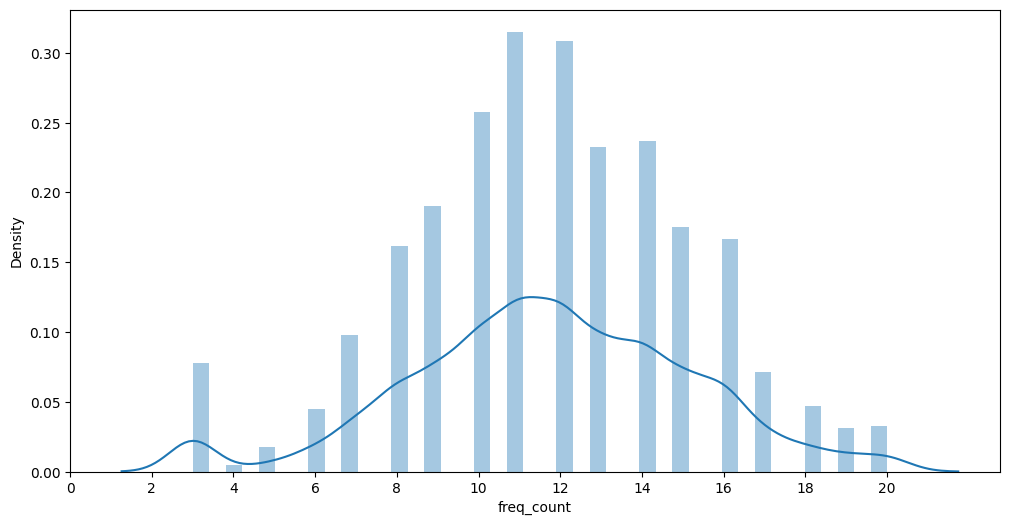

In [18]:
# Plotting device frequency distribution
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,6))

dist = sns.distplot(df_fraud.freq_count[df_fraud.freq_count > 2])
dist.set(xticks = range(0,21,2))


In [19]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_dt,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-02-24 22:55:49,1,1,April,Saturday,2,4506682.0,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-07 20:39:50,1,1,June,Monday,1,17944.0,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:44,12,11-15,January,Thursday,18,1.0,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-07-21 07:09:52,1,1,September,Wednesday,18,4361461.0,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-05-21 06:03:03,1,1,July,Thursday,8,4240931.0,0.116975,High risk,< 40


In [20]:
# Country Stats
df_fraud['country'].unique()

array(['Japan', 'United States', 'Canada', 'China', 'Brazil', 'India',
       'Argentina', 'United Kingdom', 'South Africa', 'Germany', 'Mexico',
       'Sweden', 'Korea Republic of', 'Peru', 'Portugal', 'Bangladesh',
       'France', 'Taiwan; Republic of China (ROC)', 'Russian Federation',
       'Belgium', 'Denmark', 'Netherlands', 'Iran (ISLAMIC Republic Of)',
       'Spain', 'Gabon', 'Saudi Arabia', 'Hong Kong', 'Georgia',
       'Syrian Arab Republic', 'Turkey', 'New Zealand', 'European Union',
       'Australia', 'Ukraine', 'Austria', 'Israel', 'Malaysia', 'Greece',
       'Italy', 'Norway', 'Poland', 'Venezuela', 'Thailand', 'Chile',
       'Morocco', 'Finland', 'Hungary', 'Indonesia', 'Colombia',
       'Ecuador', 'Lithuania', 'Switzerland', 'Viet Nam', 'Nigeria',
       'Egypt', 'Seychelles', 'Kazakhstan', 'Kenya',
       'Moldova Republic of', 'Trinidad and Tobago', 'Qatar', 'Bolivia',
       'Bulgaria', 'Romania', 'Croatia (LOCAL Name: Hrvatska)', 'Cyprus',
       'Czech Rep

In [21]:
# Count the number of None Countries
df_fraud['country'].isnull().sum()

np.int64(0)

In [22]:
# Count the number of None Counties and Class 1
df_fraud[(df_fraud['country'].isnull()) & (df_fraud['class'] == 1)].shape[0]

0

In [23]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_dt,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-02-24 22:55:49,1,1,April,Saturday,2,4506682.0,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-07 20:39:50,1,1,June,Monday,1,17944.0,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:44,12,11-15,January,Thursday,18,1.0,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-07-21 07:09:52,1,1,September,Wednesday,18,4361461.0,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-05-21 06:03:03,1,1,July,Thursday,8,4240931.0,0.116975,High risk,< 40


From the above we can observe that the a single user did not multiple transactions. Hence calculation of transaction frequency and density is not required.